**Step 1: Import Libraries**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


**Ignore Warnings** to keep the notebook clean

In [ ]:
warnings.filterwarnings("ignore")

**Step 2: Load Data**

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')
  # Adjust path if needed



Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Smart_Insights_AI_Driven_Analytics_Prediction/ncr_ride_bookings.csv")

In [ ]:
df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI


**Step 3: Basic Data Overview**

In [ ]:
df.shape

(150000, 21)

In [ ]:
df.size

3150000

In [ ]:
df.head()



,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [ ]:
df.tail()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI
149999,2024-03-10,15:38:03,"""CNR3447390""",Completed,"""CID4108667""",Premier Sedan,Ashok Park Main,Gurgaon Sector 29,3.5,33.7,...,NaN,NaN,NaN,NaN,NaN,806.0,21.19,4.6,4.9,Credit Card


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [ ]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [ ]:
df.dtypes

,0
Date,object
Time,object
Booking ID,object
Booking Status,object
Customer ID,object
Vehicle Type,object
Pickup Location,object
Drop Location,object
Avg VTAT,float64
Avg CTAT,float64


In [ ]:
print("Column names")
df.columns

Column names


Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [ ]:
df.columns

Index(['date', 'time', 'booking_id', 'booking_status', 'customer_id',
       'vehicle_type', 'pickup_location', 'drop_location', 'avg_vtat',
       'avg_ctat', 'cancelled_rides_by_customer',
       'reason_for_cancelling_by_customer', 'cancelled_rides_by_driver',
       'driver_cancellation_reason', 'incomplete_rides',
       'incomplete_rides_reason', 'booking_value', 'ride_distance',
       'driver_ratings', 'customer_rating', 'payment_method'],
      dtype='object')

**Step 4: Data Cleaning**

**1. Convert Date And Time to their Format**

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [ ]:
df['date']

,date
0,2024-03-23
1,2024-11-29
2,2024-08-23
3,2024-10-21
4,2024-09-16
...,...
149995,2024-11-11
149996,2024-11-24
149997,2024-09-18
149998,2024-10-05


In [ ]:
df['time'] = pd.to_datetime(df['time'], format="%H:%M:%S").dt.time
df['time']

,time
0,12:29:38
1,18:01:39
2,08:56:10
3,17:17:25
4,22:08:00
...,...
149995,19:34:01
149996,15:55:09
149997,10:55:15
149998,07:53:34


**Create Features Using Time**

In [ ]:
df['time'] = pd.to_datetime(df['time'], format="%H:%M:%S", errors='coerce')
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df['second'] = df['time'].dt.second

In [ ]:
df.dtypes

,0
date,datetime64[ns]
time,datetime64[ns]
booking_id,object
booking_status,object
customer_id,object
vehicle_type,object
pickup_location,object
drop_location,object
avg_vtat,float64
avg_ctat,float64


**Step 2: Convert IDs & Categories**

In [ ]:

cat_cols = ['booking_id', 'customer_id', 'booking_status', 'vehicle_type',
            'pickup_location', 'drop_location', 'payment_method']
for col in cat_cols:
    df[col] = df[col].astype('category')


**Check avg_vtat & booking_value in float**

In [ ]:
print(df['avg_vtat'].unique()[:10])   # first 10 unique values
print(df['booking_value'].unique()[:10])

[ nan  4.9 13.4 13.1  5.3  5.1  7.1 12.1  6.1  7.7]
[ nan 237. 627. 416. 737. 316. 640. 136. 135. 181.]


In [ ]:
print(df['avg_vtat'].describe())
print(df['booking_value'].describe())


count    139500.000000
mean          8.456352
std           3.773564
min           2.000000
25%           5.300000
50%           8.300000
75%          11.300000
max          20.000000
Name: avg_vtat, dtype: float64
count    102000.000000
mean        508.295912
std         395.805774
min          50.000000
25%         234.000000
50%         414.000000
75%         689.000000
max        4277.000000
Name: booking_value, dtype: float64


**Step 3: Handle Numeric Columns (missing values + outliers)**

In [ ]:

num_cols = ['avg_vtat', 'avg_ctat', 'cancelled_rides_by_customer',
            'cancelled_rides_by_driver', 'incomplete_rides',
            'booking_value', 'ride_distance', 'driver_ratings', 'customer_rating']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [ ]:
print(df[num_cols].dtypes)   # should all be float64 now
print(df[num_cols].describe())


avg_vtat                       float64
avg_ctat                       float64
cancelled_rides_by_customer    float64
cancelled_rides_by_driver      float64
incomplete_rides               float64
booking_value                  float64
ride_distance                  float64
driver_ratings                 float64
customer_rating                float64
dtype: object
            avg_vtat       avg_ctat  cancelled_rides_by_customer  \
count  150000.000000  150000.000000                     150000.0   
mean        8.445407      29.037753                          1.0   
std         3.639311       7.343053                          0.0   
min         2.000000      10.000000                          1.0   
25%         5.600000      25.000000                          1.0   
50%         8.300000      28.800000                          1.0   
75%        11.000000      32.900000                          1.0   
max        20.000000      45.000000                          1.0   

       cancelled_rides

**Step 4: Clean Reason Columns (standardize text)**

In [ ]:
reason_cols = ['reason_for_cancelling_by_customer',
               'driver_cancellation_reason',
               'incomplete_rides_reason']

for col in reason_cols:
    df[col] = df[col].str.strip().str.lower()   # remove spaces + lowercase

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   date                               150000 non-null  datetime64[ns]
 1   time                               150000 non-null  datetime64[ns]
 2   booking_id                         150000 non-null  category      
 3   booking_status                     150000 non-null  category      
 4   customer_id                        150000 non-null  category      
 5   vehicle_type                       150000 non-null  category      
 6   pickup_location                    150000 non-null  category      
 7   drop_location                      150000 non-null  category      
 8   avg_vtat                           150000 non-null  float64       
 9   avg_ctat                           150000 non-null  float64       
 10  cancelled_rides_by_c

In [ ]:
print("Summary Statistics")
df.describe()

Summary Statistics


,date,time,avg_vtat,avg_ctat,cancelled_rides_by_customer,cancelled_rides_by_driver,incomplete_rides,booking_value,ride_distance,driver_ratings,customer_rating,hour,minute,second
count,150000,150000,150000.000000,150000.000000,150000.0,150000.0,150000.0,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,2024-06-30 16:42:40.320000,1900-01-01 14:32:00.931033344,8.445407,29.037753,1.0,1.0,1.0,478.121220,24.343568,4.257215,4.440842,14.034113,29.477113,29.496233
min,2024-01-01 00:00:00,1900-01-01 00:00:00,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000,0.000000,0.000000,0.000000
25%,2024-03-31 00:00:00,1900-01-01 10:20:25,5.600000,25.000000,1.0,1.0,1.0,319.750000,17.360000,4.200000,4.300000,10.000000,15.000000,15.000000
50%,2024-07-01 00:00:00,1900-01-01 15:23:33,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000,15.000000,29.000000,29.000000
75%,2024-09-30 00:00:00,1900-01-01 18:57:31,11.000000,32.900000,1.0,1.0,1.0,521.000000,30.650000,4.300000,4.600000,18.000000,44.000000,44.000000
max,2024-12-30 00:00:00,1900-01-01 23:59:59,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000,23.000000,59.000000,59.000000
std,NaN,NaN,3.639311,7.343053,0.0,0.0,0.0,329.339976,11.554362,0.345619,0.347835,5.416906,17.310640,17.295697


In [ ]:
df.describe(include='object')   # For categorical data

,reason_for_cancelling_by_customer,driver_cancellation_reason,incomplete_rides_reason
count,10500,27000,9000
unique,5,4,3
top,wrong address,customer related issue,customer demand
freq,2362,6837,3040


**Check Missing Values**

In [ ]:
print("Missing Values")
print(df.isnull().sum())
df.isna().mean()*100   # percentage of missing values

Missing Values
date                                      0
time                                      0
booking_id                                0
booking_status                            0
customer_id                               0
vehicle_type                              0
pickup_location                           0
drop_location                             0
avg_vtat                                  0
avg_ctat                                  0
cancelled_rides_by_customer               0
reason_for_cancelling_by_customer    139500
cancelled_rides_by_driver                 0
driver_cancellation_reason           123000
incomplete_rides                          0
incomplete_rides_reason              141000
booking_value                             0
ride_distance                             0
driver_ratings                            0
customer_rating                           0
payment_method                        48000
hour                                      0
minute           

,0
date,0.0
time,0.0
booking_id,0.0
booking_status,0.0
customer_id,0.0
vehicle_type,0.0
pickup_location,0.0
drop_location,0.0
avg_vtat,0.0
avg_ctat,0.0


**Handling Missing Values**

In [ ]:
df['payment_method'].unique()

[NaN, 'UPI', 'Debit Card', 'Cash', 'Uber Wallet', 'Credit Card']
Categories (5, object): ['Cash', 'Credit Card', 'Debit Card', 'UPI', 'Uber Wallet']

**Payment_method Missing Values Handles**

In [ ]:
df['payment_method'].dtypes

CategoricalDtype(categories=['Cash', 'Credit Card', 'Debit Card', 'UPI', 'Uber Wallet'], ordered=False, categories_dtype=object)

In [ ]:
# Add "Unknown" as a valid category
df['payment_method'] = df['payment_method'].cat.add_categories("Unknown")

# Now you can safely fill missing values
df['payment_method'] = df['payment_method'].fillna("Unknown")


In [ ]:
df['driver_cancellation_reason'].unique()

array([nan, 'personal & car related issues', 'customer related issue',
       'more than permitted people in there',
       'the customer was coughing/sick'], dtype=object)

**driver_cancellation_reason values Handles**

In [ ]:
df['driver_cancellation_reason'] = df['driver_cancellation_reason'].fillna("No Reason")


In [ ]:
df['incomplete_rides_reason'].unique()

array([nan, 'vehicle breakdown', 'other issue', 'customer demand'],
      dtype=object)

**incomplete_rides_reason Values Handle**

In [ ]:
df['incomplete_rides_reason'] = df['incomplete_rides_reason'].fillna("No Reason")


**reason_for_cancelling_by_customer values by Handle**

In [ ]:
df['reason_for_cancelling_by_customer'] = df['reason_for_cancelling_by_customer'].fillna("No Reason")


**After Clear Missing Values**

In [ ]:
print(df.isnull().sum())

date                                 0
time                                 0
booking_id                           0
booking_status                       0
customer_id                          0
vehicle_type                         0
pickup_location                      0
drop_location                        0
avg_vtat                             0
avg_ctat                             0
cancelled_rides_by_customer          0
reason_for_cancelling_by_customer    0
cancelled_rides_by_driver            0
driver_cancellation_reason           0
incomplete_rides                     0
incomplete_rides_reason              0
booking_value                        0
ride_distance                        0
driver_ratings                       0
customer_rating                      0
payment_method                       0
hour                                 0
minute                               0
second                               0
dtype: int64


**Checking For Duplicates**

In [ ]:
df.duplicated().any()

np.False_

**EDA (Visuvalization)**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**1. Time-based Demand Trends**

**Daily ride demand trend**

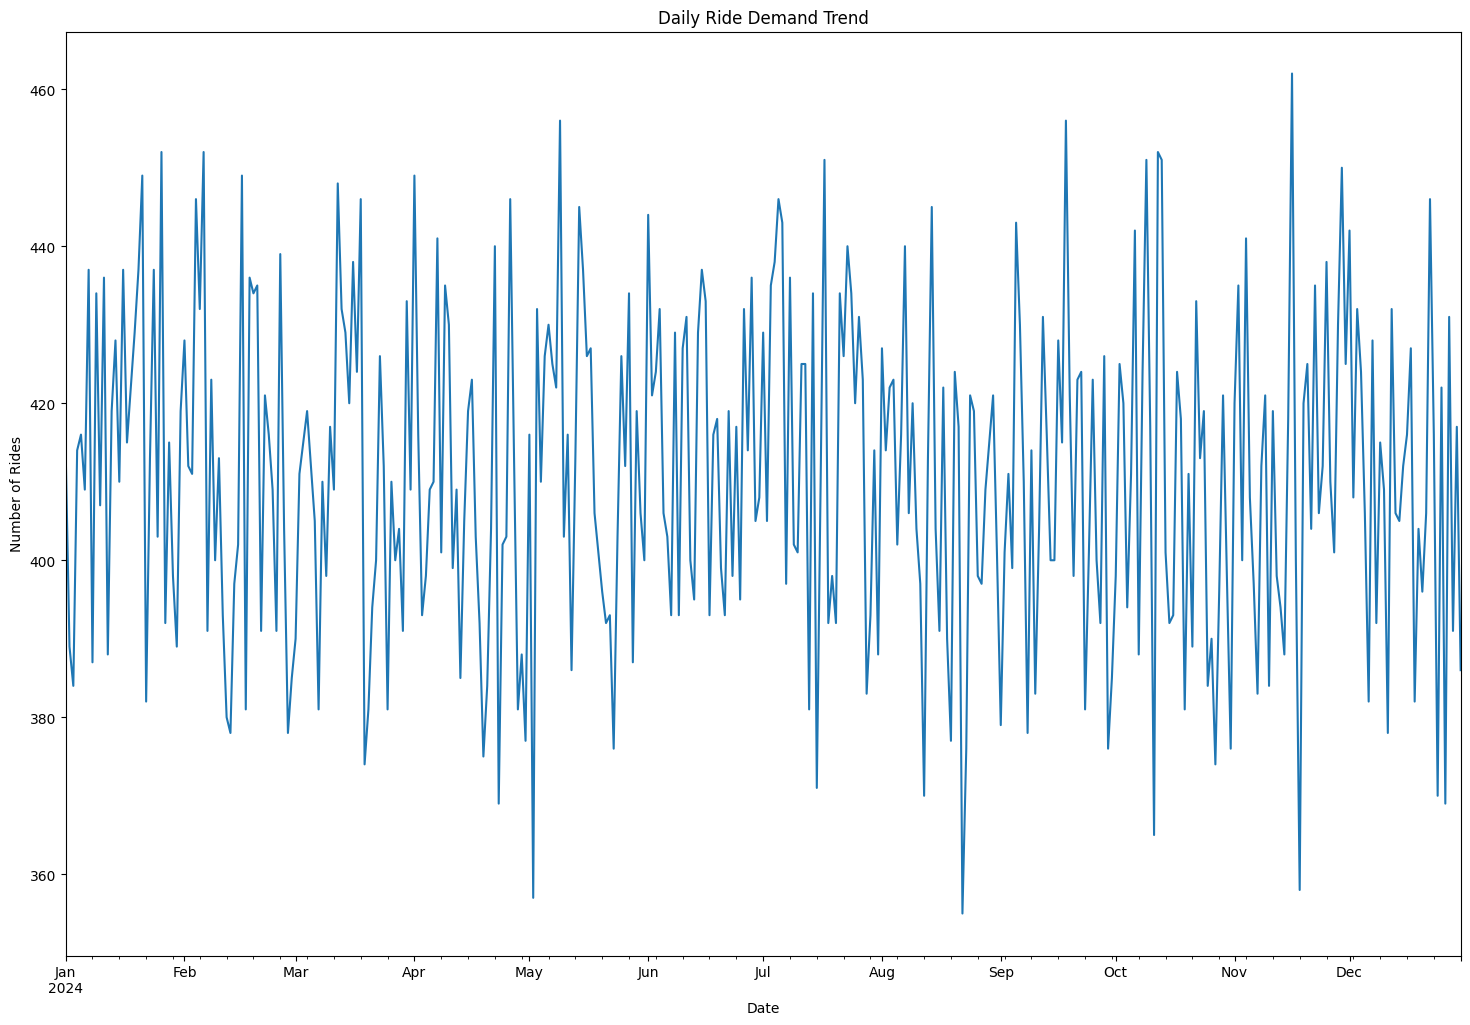

In [ ]:
df['date'] = pd.to_datetime(df['date'])
daily_demand = df.groupby('date').size()

plt.figure(figsize=(18,12))
daily_demand.plot()
plt.title("Daily Ride Demand Trend")
plt.xlabel("Date")
plt.ylabel("Number of Rides")
plt.show()


**Hourly demand pattern**

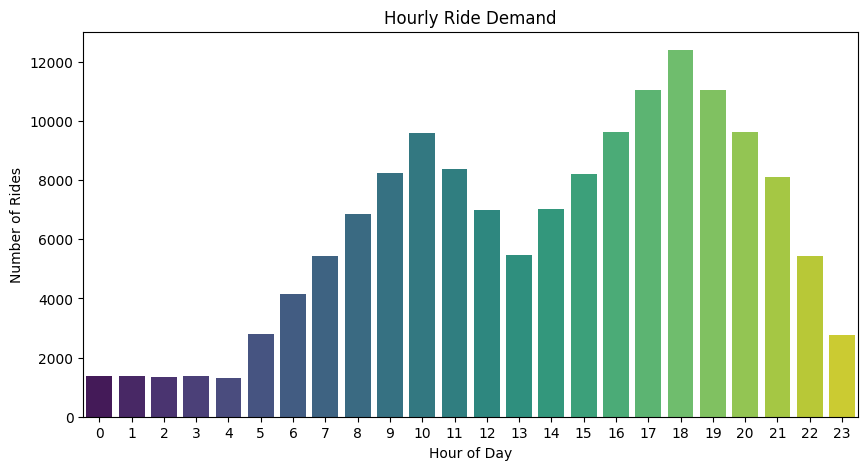

In [ ]:
hourly_demand = df.groupby('hour').size()

plt.figure(figsize=(10,5))
sns.barplot(x=hourly_demand.index, y=hourly_demand.values, palette="viridis")
plt.title("Hourly Ride Demand")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Rides")
plt.show()

**Day of week pattern**

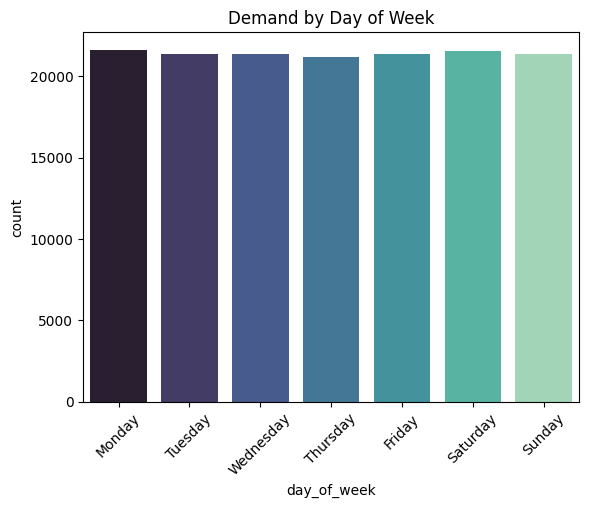

In [ ]:
df['day_of_week'] = df['date'].dt.day_name()
sns.countplot(data=df, x='day_of_week', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette="mako")
plt.title("Demand by Day of Week")
plt.xticks(rotation=45)
plt.show()

**2. Location-based Analysis**

**Top pickup locations**

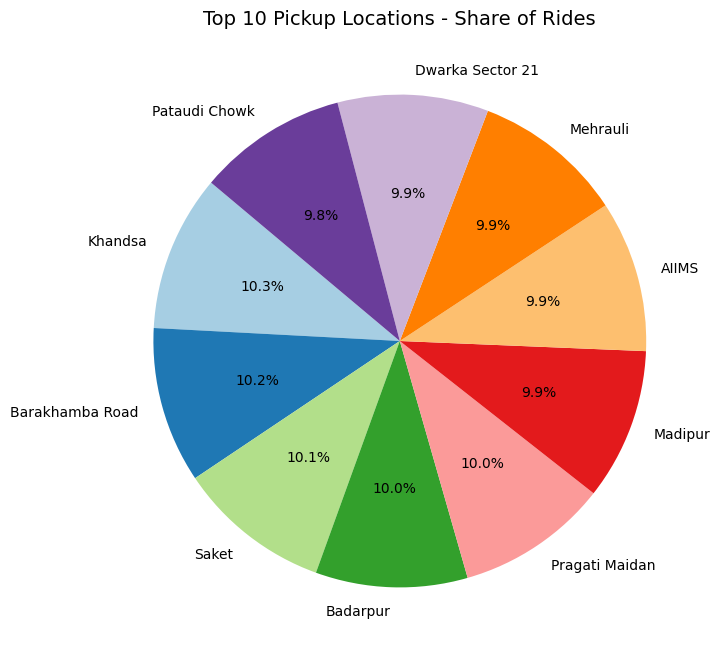

In [ ]:
top_pickups = df['pickup_location'].value_counts().head(10)

plt.figure(figsize=(8,8))
plt.pie(top_pickups.values, labels=top_pickups.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Paired"))
plt.title("Top 10 Pickup Locations - Share of Rides", fontsize=14)
plt.show()



**Top drop locations**

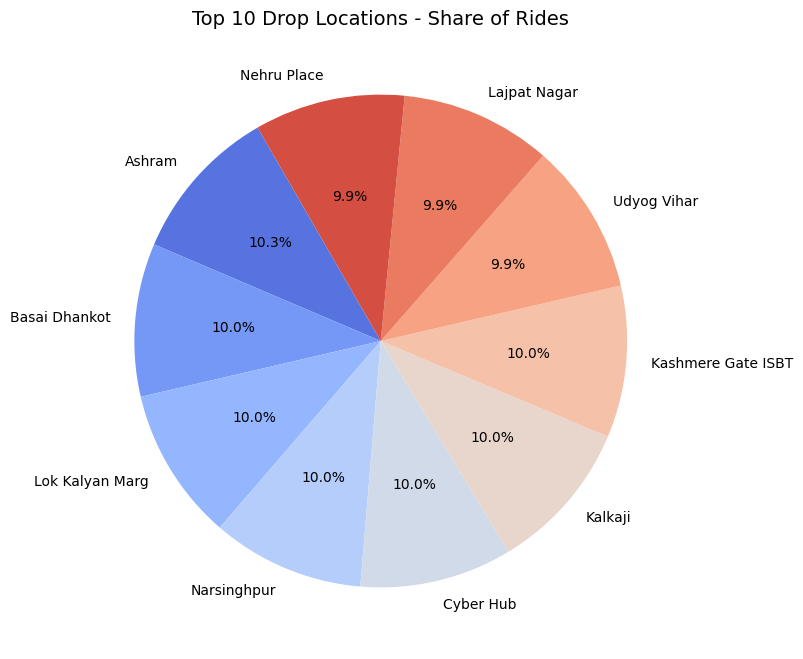

In [ ]:
top_drops = df['drop_location'].value_counts().head(10)

plt.figure(figsize=(8,8))
plt.pie(top_drops.values, labels=top_drops.index, autopct='%1.1f%%',
        startangle=120, colors=sns.color_palette("coolwarm", 10))
plt.title("Top 10 Drop Locations - Share of Rides", fontsize=14)
plt.show()


**3. Vehicle Type Analysis**

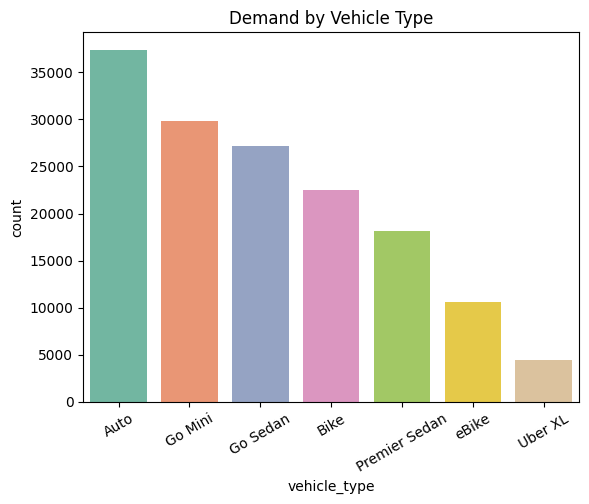

In [ ]:
sns.countplot(data=df, x='vehicle_type', order=df['vehicle_type'].value_counts().index, palette="Set2")
plt.title("Demand by Vehicle Type")
plt.xticks(rotation=30)
plt.show()


**4. Cancellations**

**Customer cancellation reasons**

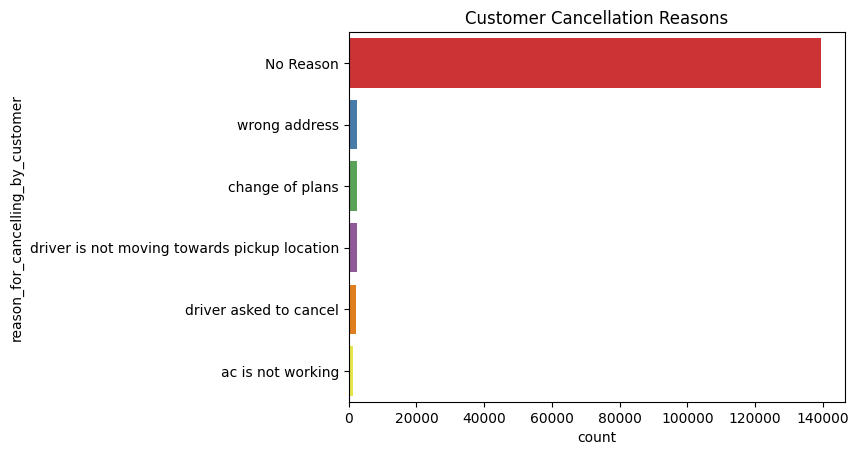

In [ ]:
sns.countplot(data=df, y='reason_for_cancelling_by_customer', order=df['reason_for_cancelling_by_customer'].value_counts().index, palette="Set1")
plt.title("Customer Cancellation Reasons")
plt.show()


**Driver cancellation reasons**

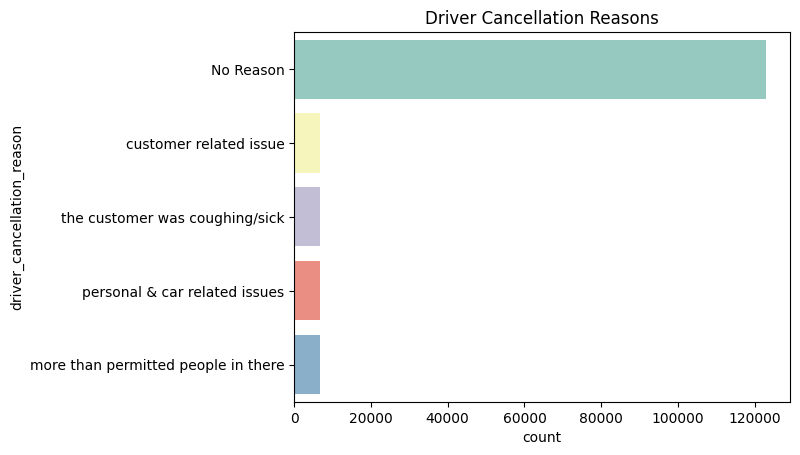

In [ ]:
sns.countplot(data=df, y='driver_cancellation_reason', order=df['driver_cancellation_reason'].value_counts().index, palette="Set3")
plt.title("Driver Cancellation Reasons")
plt.show()


**5. Operational Metrics**

**Avg VTAT vs. Avg CTAT**

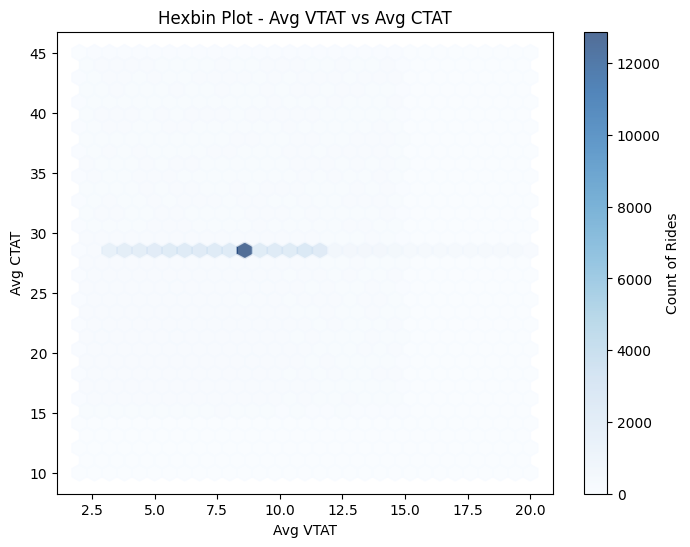

In [ ]:
plt.figure(figsize=(8,6))
plt.hexbin(df['avg_vtat'], df['avg_ctat'], gridsize=30, cmap="Blues", alpha=0.7)
plt.colorbar(label="Count of Rides")
plt.title("Hexbin Plot - Avg VTAT vs Avg CTAT")
plt.xlabel("Avg VTAT")
plt.ylabel("Avg CTAT")
plt.show()


**Booking Value vs Ride Distance**

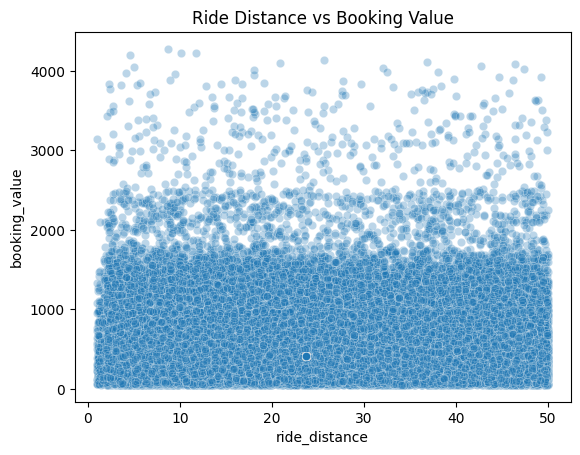

In [ ]:
sns.scatterplot(data=df, x='ride_distance', y='booking_value', alpha=0.3)
plt.title("Ride Distance vs Booking Value")
plt.show()


**6. Ratings**

**Driver ratings distribution**

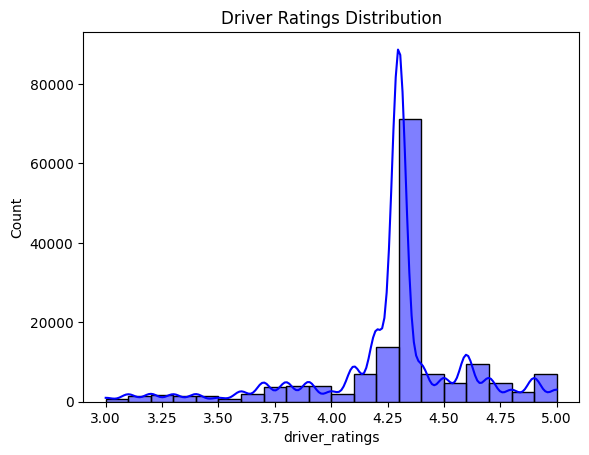

In [ ]:
sns.histplot(df['driver_ratings'], bins=20, kde=True, color="blue")
plt.title("Driver Ratings Distribution")
plt.show()


**Customer ratings distribution**

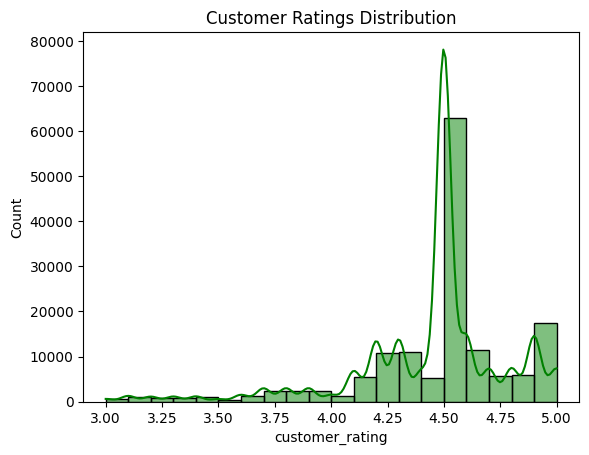

In [ ]:
sns.histplot(df['customer_rating'], bins=20, kde=True, color="green")
plt.title("Customer Ratings Distribution")
plt.show()


**7. Payment Method**

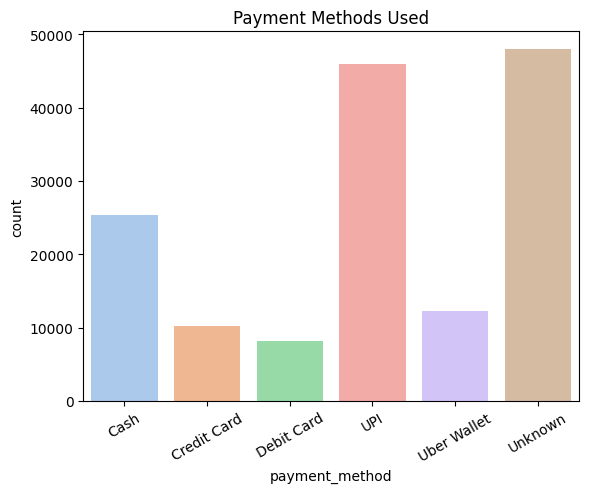

In [ ]:
sns.countplot(data=df, x='payment_method', palette="pastel")
plt.title("Payment Methods Used")
plt.xticks(rotation=30)
plt.show()


**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

**Encoding for payment_method**

In [ ]:
df['payment_method'].unique()

['Unknown', 'UPI', 'Debit Card', 'Cash', 'Uber Wallet', 'Credit Card']
Categories (6, object): ['Cash', 'Credit Card', 'Debit Card', 'UPI', 'Uber Wallet', 'Unknown']

In [ ]:
df['payment_method'] = le.fit_transform(df['payment_method'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Cash': np.int64(0), 'Credit Card': np.int64(1), 'Debit Card': np.int64(2), 'UPI': np.int64(3), 'Uber Wallet': np.int64(4), 'Unknown': np.int64(5)}


**Encoding for driver_cancellation_reason**

In [ ]:
df['driver_cancellation_reason'].unique()

array(['No Reason', 'personal & car related issues',
       'customer related issue', 'more than permitted people in there',
       'the customer was coughing/sick'], dtype=object)

In [ ]:
df['driver_cancellation_reason'] = le.fit_transform(df['driver_cancellation_reason'])

# To see mapping
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'No Reason': np.int64(0), 'customer related issue': np.int64(1), 'more than permitted people in there': np.int64(2), 'personal & car related issues': np.int64(3), 'the customer was coughing/sick': np.int64(4)}


**Encoding for incomplete_rides_reason**

In [ ]:
df['incomplete_rides_reason'].unique()

array(['No Reason', 'vehicle breakdown', 'other issue', 'customer demand'],
      dtype=object)

In [ ]:
df['incomplete_rides_reason'] = le.fit_transform(df['incomplete_rides_reason'])

# To see mapping
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'No Reason': np.int64(0), 'customer demand': np.int64(1), 'other issue': np.int64(2), 'vehicle breakdown': np.int64(3)}


**Encoding For reason_for_cancelling_by_Customer**

In [ ]:
df['reason_for_cancelling_by_customer'].unique()

array(['No Reason', 'driver is not moving towards pickup location',
       'driver asked to cancel', 'ac is not working', 'change of plans',
       'wrong address'], dtype=object)

In [ ]:
df['reason_for_cancelling_by_customer'] = le.fit_transform(df['reason_for_cancelling_by_customer'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'No Reason': np.int64(0), 'ac is not working': np.int64(1), 'change of plans': np.int64(2), 'driver asked to cancel': np.int64(3), 'driver is not moving towards pickup location': np.int64(4), 'wrong address': np.int64(5)}


**Encoding for Pick_up Location**

In [ ]:
df['pickup_location'].unique()

['Palam Vihar', 'Shastri Nagar', 'Khandsa', 'Central Secretariat', 'Ghitorni Village', ..., 'Udyog Vihar', 'Hauz Khas', 'Paschim Vihar', 'Ambience Mall', 'Lal Quila']
Length: 176
Categories (176, object): ['AIIMS', 'Adarsh Nagar', 'Akshardham', 'Ambience Mall', ...,
                           'Vinobapuri', 'Vishwavidyalaya', 'Welcome', 'Yamuna Bank']

In [ ]:
df['pickup_location']=le.fit_transform(df['pickup_location'])
df['payment_method']

,payment_method
0,5
1,3
2,2
3,3
4,3
...,...
149995,4
149996,3
149997,0
149998,3


**Encoding For vehicle_type**

In [ ]:
df['vehicle_type'].unique()

['eBike', 'Go Sedan', 'Auto', 'Premier Sedan', 'Bike', 'Go Mini', 'Uber XL']
Categories (7, object): ['Auto', 'Bike', 'Go Mini', 'Go Sedan', 'Premier Sedan', 'Uber XL',
                         'eBike']

In [ ]:
df['vehicle_type']=le.fit_transform(df['vehicle_type'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Auto': np.int64(0), 'Bike': np.int64(1), 'Go Mini': np.int64(2), 'Go Sedan': np.int64(3), 'Premier Sedan': np.int64(4), 'Uber XL': np.int64(5), 'eBike': np.int64(6)}


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   date                               150000 non-null  datetime64[ns]
 1   time                               150000 non-null  datetime64[ns]
 2   booking_id                         150000 non-null  category      
 3   booking_status                     150000 non-null  category      
 4   customer_id                        150000 non-null  category      
 5   vehicle_type                       150000 non-null  int64         
 6   pickup_location                    150000 non-null  int64         
 7   drop_location                      150000 non-null  category      
 8   avg_vtat                           150000 non-null  float64       
 9   avg_ctat                           150000 non-null  float64       
 10  cancelled_rides_by_c

**Feature Engineering**

**Date & Time features**

In [ ]:

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['day_of_week'] = df['date'].dt.day_name()
df['is_weekend'] = df['date'].dt.dayofweek >= 5
df['month'] = df['date'].dt.month

df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S', errors='coerce')
df['is_peak_hour'] = df['hour'].isin([7,8,9,17,18,19,20]).astype(int)

**Operational features**

In [ ]:

df['efficiency'] = df['avg_ctat'] / (df['avg_vtat'] + 1e-5)

**Cancellations**

In [ ]:

df['total_cancellations'] = df['cancelled_rides_by_customer'] + df['cancelled_rides_by_driver']

**Value & Distance**

In [ ]:

df['fare_per_km'] = df['booking_value'] / (df['ride_distance'] + 1e-5)

**Ratings**

In [ ]:

df['rating_gap'] = df['driver_ratings'] - df['customer_rating']

**Payment method (example: binary Cash vs Non-Cash)**

In [ ]:

df['is_cash'] = (df['payment_method'] == 'Cash').astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 33 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   date                               150000 non-null  datetime64[ns]
 1   time                               150000 non-null  datetime64[ns]
 2   booking_id                         150000 non-null  category      
 3   booking_status                     150000 non-null  category      
 4   customer_id                        150000 non-null  category      
 5   vehicle_type                       150000 non-null  int64         
 6   pickup_location                    150000 non-null  int64         
 7   drop_location                      150000 non-null  category      
 8   avg_vtat                           150000 non-null  float64       
 9   avg_ctat                           150000 non-null  float64       
 10  cancelled_rides_by_c

**Encoding For day_of_week**

In [ ]:
df['day_of_week']=le.fit_transform(df['day_of_week'])
df['day_of_week'].unique()

array([2, 0, 1, 5, 6, 3, 4])

**Encoding For is_weekend**

In [ ]:
df['is_weekend']=le.fit_transform(df['is_weekend'])
df['is_weekend'].unique()

array([1, 0])

In [ ]:
df

,date,time,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,...,second,day_of_week,is_weekend,month,is_peak_hour,efficiency,total_cancellations,fare_per_km,rating_gap,is_cash
0,2024-03-23,1900-01-01 12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",6,116,Jhilmil,8.3,28.8,...,38,2,1,3,0,3.469875,2.0,17.453618,-0.2,0
1,2024-11-29,1900-01-01 18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",3,149,Gurgaon Sector 56,4.9,14.0,...,39,0,0,11,1,2.857137,2.0,41.361184,-0.2,0
2,2024-08-23,1900-01-01 08:56:10,"""CNR8494506""",Completed,"""CID9202816""",0,80,Malviya Nagar,13.4,25.8,...,10,0,0,8,1,1.925372,2.0,46.170805,0.0,0
3,2024-10-21,1900-01-01 17:17:25,"""CNR8906825""",Completed,"""CID2610914""",4,21,Inderlok,13.1,28.5,...,25,1,0,10,1,2.175571,2.0,12.228098,-0.4,0
4,2024-09-16,1900-01-01 22:08:00,"""CNR1950162""",Completed,"""CID9933542""",1,39,Khan Market,5.3,19.6,...,0,1,0,9,0,3.698106,2.0,15.287282,-0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,1900-01-01 19:34:01,"""CNR6500631""",Completed,"""CID4337371""",2,87,Ghitorni,10.2,44.4,...,1,1,0,11,1,4.352937,2.0,11.851294,-0.4,0
149996,2024-11-24,1900-01-01 15:55:09,"""CNR2468611""",Completed,"""CID2325623""",2,40,Akshardham,5.1,30.8,...,9,3,1,11,0,6.039204,2.0,51.290450,-0.2,0
149997,2024-09-18,1900-01-01 10:55:15,"""CNR6358306""",Completed,"""CID9925486""",3,146,Jor Bagh,2.7,23.4,...,15,6,0,9,0,8.666635,2.0,53.483959,-0.5,0
149998,2024-10-05,1900-01-01 07:53:34,"""CNR3030099""",Completed,"""CID9415487""",0,37,Saidulajab,6.9,39.6,...,34,2,1,10,1,5.739122,2.0,7.312251,0.4,0


**1. Time-based features (hour, day_of_week, is_weekend, is_peak_hour, month)**

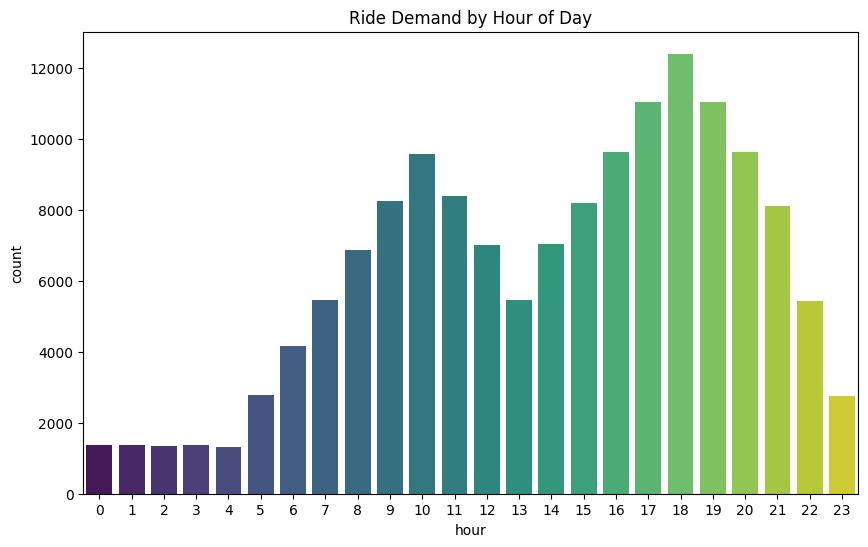

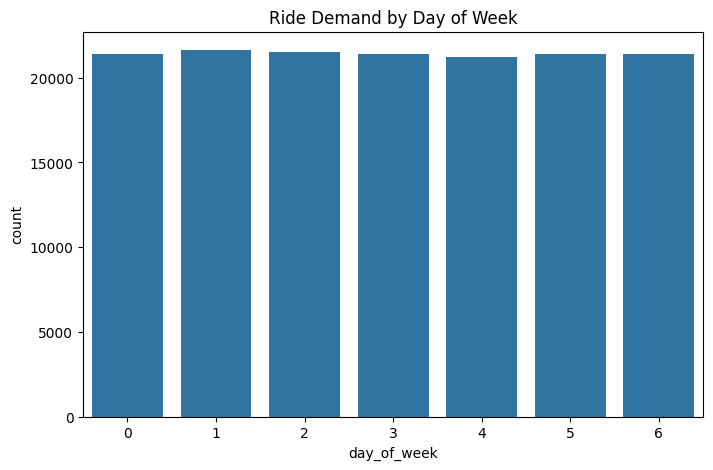

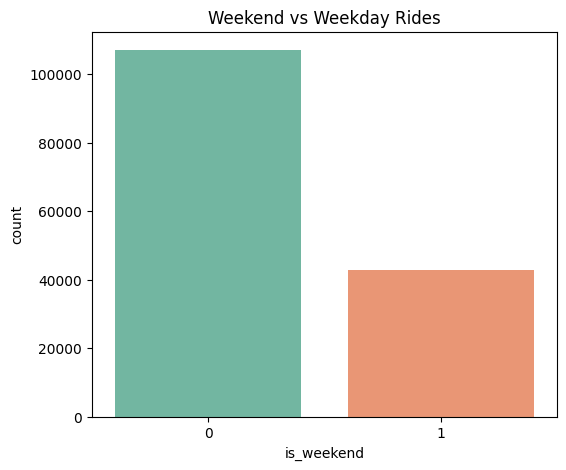

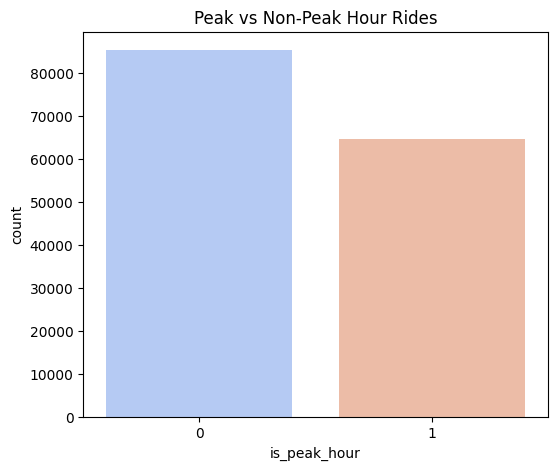

In [ ]:
#Time features → demand cycles
# Ride demand by hour of day
plt.figure(figsize=(10,6))
sns.countplot(x='hour', data=df, palette="viridis")
plt.title("Ride Demand by Hour of Day")
plt.show()

# Day of week vs demand
plt.figure(figsize=(8,5))
sns.countplot(x='day_of_week', data=df )
plt.title("Ride Demand by Day of Week")
plt.show()

# Weekend vs Weekday rides
plt.figure(figsize=(6,5))
sns.countplot(x='is_weekend', data=df, palette="Set2")
plt.title("Weekend vs Weekday Rides")
plt.show()

# Peak vs Non-Peak hours
plt.figure(figsize=(6,5))
sns.countplot(x='is_peak_hour', data=df, palette="coolwarm")
plt.title("Peak vs Non-Peak Hour Rides")
plt.show()

#These plots justify why you created time features → patterns in demand.


**2. Cancellation-related features (total_cancellations, reason_for_cancelling_by_customer, driver_cancellation_reason)**

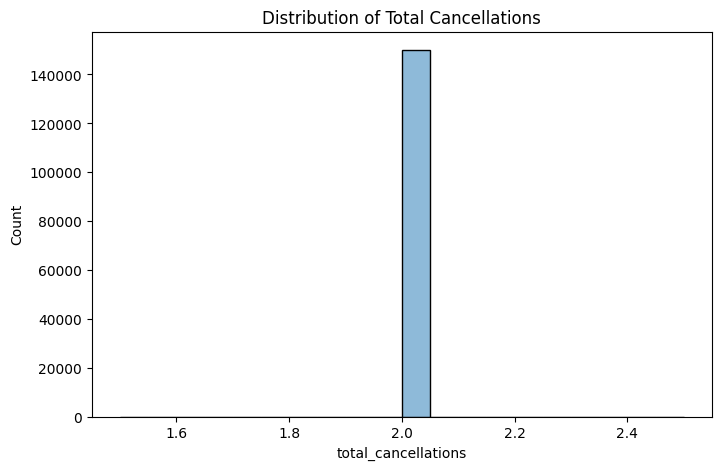

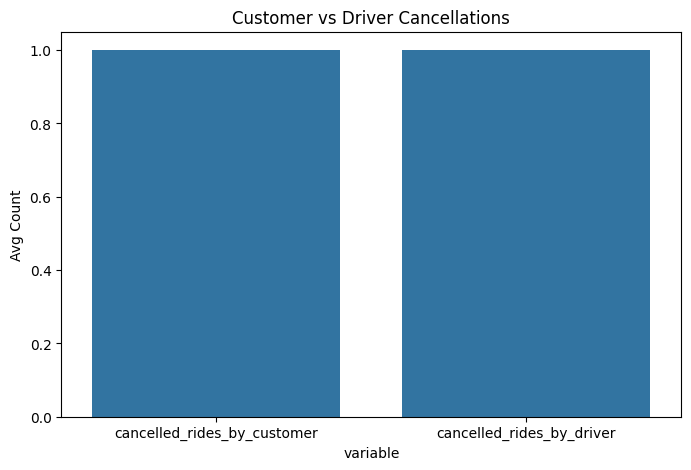

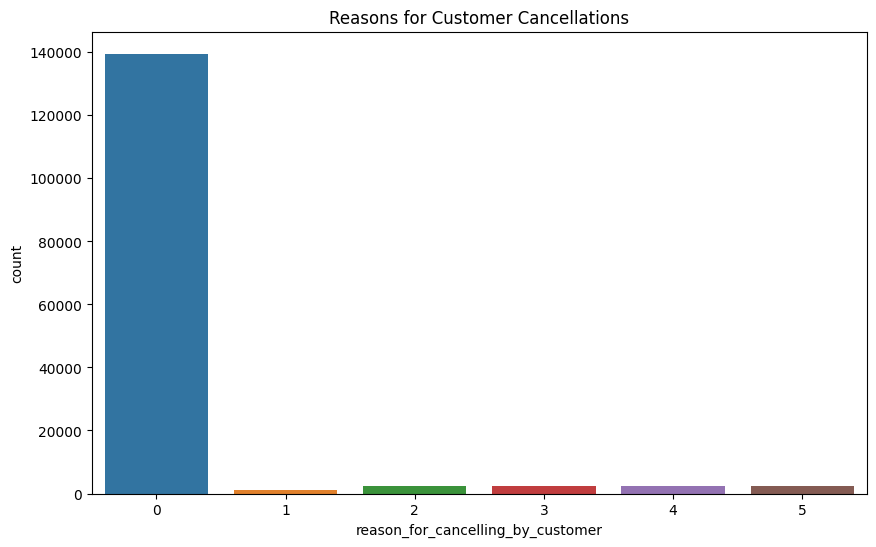

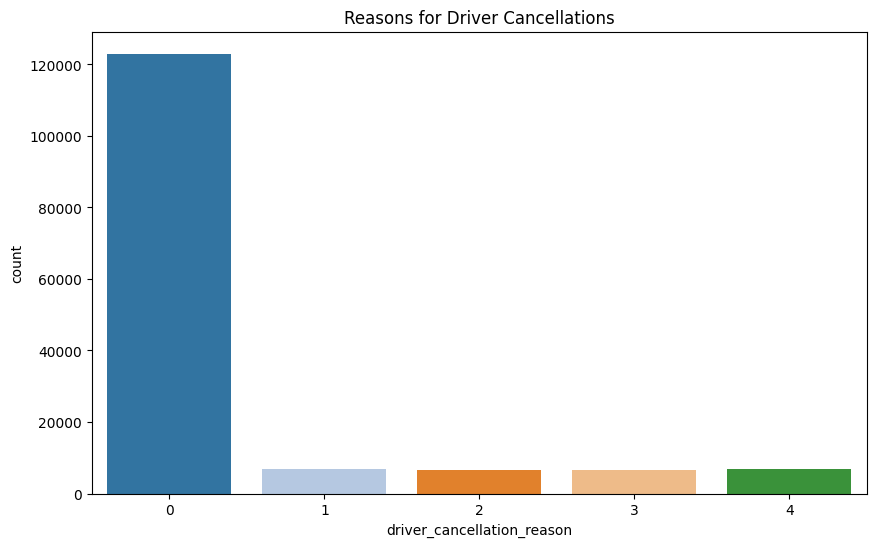

In [ ]:
#Cancellation features → reliability issues
# Distribution of cancellations
plt.figure(figsize=(8,5))
sns.histplot(df['total_cancellations'], bins=20, kde=True)
plt.title("Distribution of Total Cancellations")
plt.show()

# Customer vs Driver cancellations
plt.figure(figsize=(8,5))
sns.barplot(data=df[['cancelled_rides_by_customer','cancelled_rides_by_driver']].melt(),
            x='variable', y='value')
plt.title("Customer vs Driver Cancellations")
plt.ylabel("Avg Count")
plt.show()

# Cancellation reasons
plt.figure(figsize=(10,6))
sns.countplot(x='reason_for_cancelling_by_customer', data=df, palette="tab10")
plt.title("Reasons for Customer Cancellations")
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='driver_cancellation_reason', data=df, palette="tab20")
plt.title("Reasons for Driver Cancellations")
plt.show()

#These show why cancellation-related features matter (different actors cancel for different reasons).


**3. Efficiency-related features (efficiency, avg_vtat, avg_ctat)**

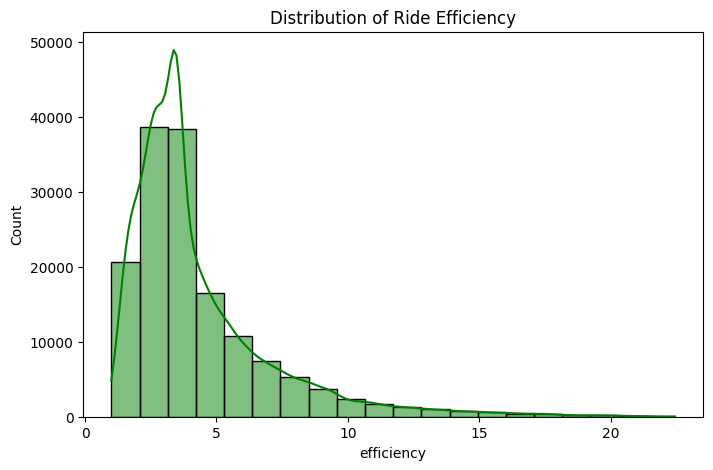

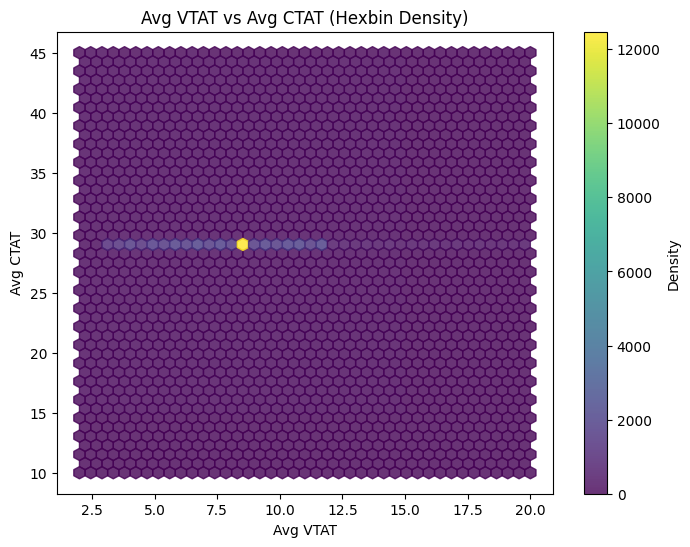

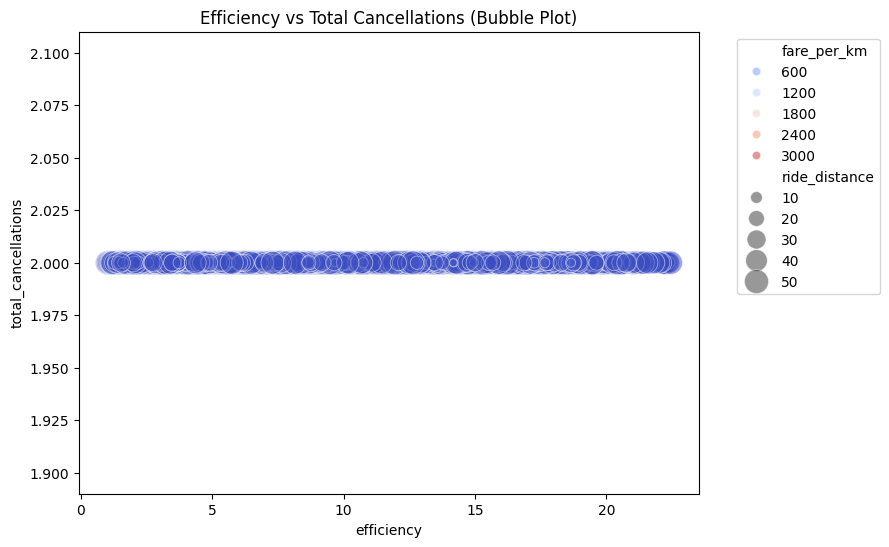

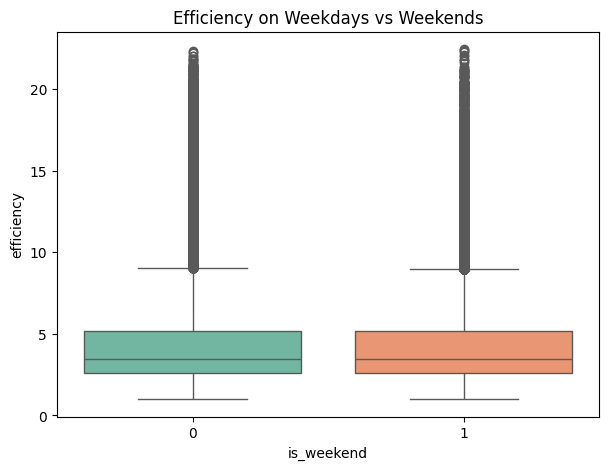

In [ ]:
#Efficiency features → service quality
# Efficiency distribution
plt.figure(figsize=(8,5))
sns.histplot(df['efficiency'], bins=20, kde=True, color="green")
plt.title("Distribution of Ride Efficiency")
plt.show()

#Hexbin Plot (better than scatter when points overlap)
# Hexbin plot for VTAT vs CTAT
plt.figure(figsize=(8,6))
plt.hexbin(df['avg_vtat'], df['avg_ctat'], gridsize=40, cmap="viridis", alpha=0.8)
plt.colorbar(label="Density")
plt.title("Avg VTAT vs Avg CTAT (Hexbin Density)")
plt.xlabel("Avg VTAT")
plt.ylabel("Avg CTAT")
plt.show()

# Bubble plot: Efficiency vs Total Cancellations (bubble size = ride_distance)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='efficiency',
    y='total_cancellations',
    size='ride_distance',
    hue='fare_per_km',
    data=df, alpha=0.5, palette="coolwarm", sizes=(20, 300)
)
plt.title("Efficiency vs Total Cancellations (Bubble Plot)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Boxplot: Efficiency vs Weekend/Weekday
plt.figure(figsize=(7,5))
sns.boxplot(x='is_weekend', y='efficiency', data=df, palette="Set2")
plt.title("Efficiency on Weekdays vs Weekends")
plt.show()


#Justifies why efficiency is created → links time + cancellations.


**4. Rating features (driver_ratings, customer_rating, rating_gap)**

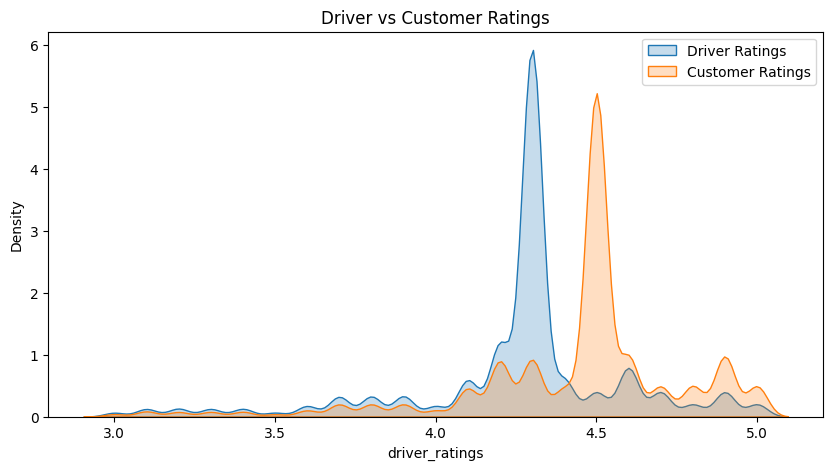

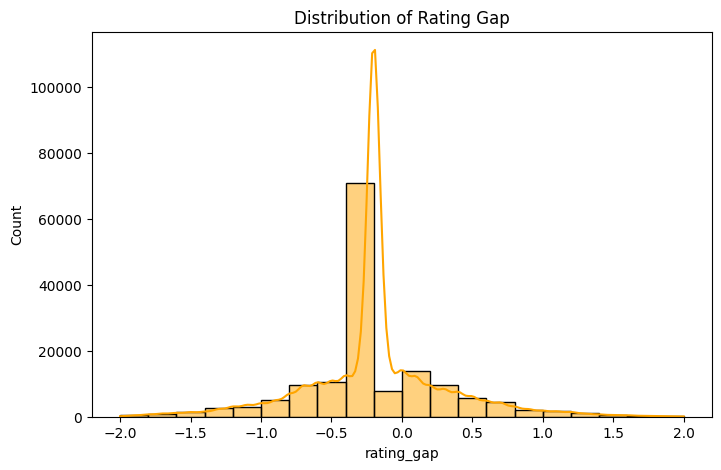

In [ ]:
#Ratings features → satisfaction gaps
# Distribution of driver and customer ratings
plt.figure(figsize=(10,5))
sns.kdeplot(df['driver_ratings'], label="Driver Ratings", fill=True)
sns.kdeplot(df['customer_rating'], label="Customer Ratings", fill=True)
plt.title("Driver vs Customer Ratings")
plt.legend()
plt.show()

# Rating gap
plt.figure(figsize=(8,5))
sns.histplot(df['rating_gap'], bins=20, kde=True, color="orange")
plt.title("Distribution of Rating Gap")
plt.show()

#This shows why you engineered rating_gap (detect conflicts between drivers & customers).

**5. Revenue-related features (booking_value, fare_per_km, ride_distance)**

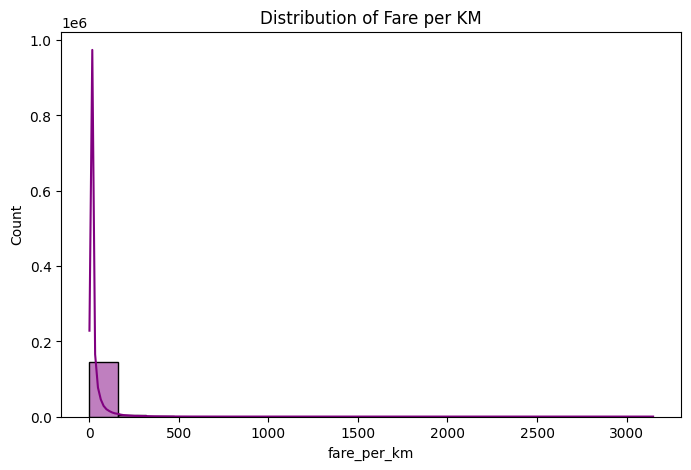

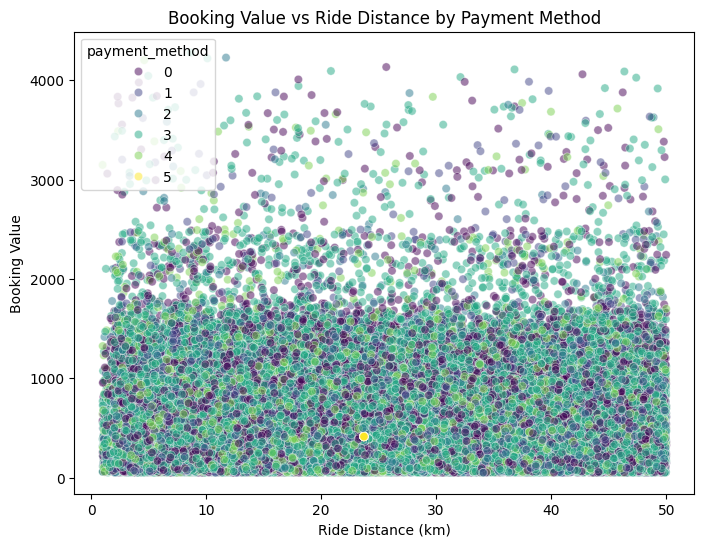

In [ ]:
#Revenue features → pricing patterns
# Fare per km distribution
plt.figure(figsize=(8,5))
sns.histplot(df['fare_per_km'], bins=20, kde=True, color="purple")
plt.title("Distribution of Fare per KM")
plt.show()

#Booking Value vs Ride Distance by Payment Method
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='ride_distance',
    y='booking_value',
    hue='payment_method',
    data=df, alpha=0.5, palette="viridis"
)
plt.title("Booking Value vs Ride Distance by Payment Method")
plt.xlabel("Ride Distance (km)")
plt.ylabel("Booking Value")
plt.show()


#Justifies why fare_per_km is important → measures pricing fairness.


In [ ]:
# Drop irrelevant ID and free-text columns
drop_cols = ['booking_id', 'customer_id',
             'reason_for_cancelling_by_customer',
             'driver_cancellation_reason',
             'incomplete_rides_reason']

df = df.drop(columns=drop_cols)

This gives you ride demand = number of rides per hour per day.Converts the grouped result into a DataFrame with proper columns.
The new column is named "ride_demand".
Joins this ride_demand info back into the original dataset.Every row in your dataset now has a new column "ride_demand", which tells you how many total rides were requested in that hour.

This step creates the target variable (ride_demand) for forecasting model:
Before: You only had individual ride details.
After: You now know how many rides happened in a given hour — that’s the demand you want to predict.

In [ ]:
# Create demand target
demand = df.groupby(['date','hour']).size().reset_index(name='ride_demand')
df = df.merge(demand, on=['date','hour'], how='left')


In [ ]:
# Define X and y
X = df[['day_of_week','is_weekend','month','hour','is_peak_hour',
              'vehicle_type','pickup_location','avg_vtat','avg_ctat','efficiency',
              'cancelled_rides_by_customer','cancelled_rides_by_driver','total_cancellations',
              'incomplete_rides','booking_value','ride_distance','fare_per_km',
              'driver_ratings','customer_rating','rating_gap','payment_method','is_cash']]

y = df['ride_demand']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train)

Train shape:         day_of_week  is_weekend  month  hour  is_peak_hour  vehicle_type  \
104025            1           0      2     1             0             0   
5415              6           0      9    12             0             3   
75612             5           0     11    21             0             6   
138169            0           0      6    21             0             6   
87184             4           0      7    12             0             0   
...             ...         ...    ...   ...           ...           ...   
119879            4           0      1     9             1             4   
103694            6           0      3    21             0             6   
131932            2           1      8    21             0             2   
146867            4           0      6    18             1             4   
121958            0           0      5     8             1             0   

        pickup_location  avg_vtat  avg_ctat  efficiency  ...  \
104025    

In [ ]:
y_train

,ride_demand
104025,5
5415,17
75612,22
138169,18
87184,16
...,...
119879,21
103694,11
131932,23
146867,37


In [ ]:
X_test

,day_of_week,is_weekend,month,hour,is_peak_hour,vehicle_type,pickup_location,avg_vtat,avg_ctat,efficiency,...,total_cancellations,incomplete_rides,booking_value,ride_distance,fare_per_km,driver_ratings,customer_rating,rating_gap,payment_method,is_cash
59770,0,0,10,16,0,3,8,18.7,28.8,1.540106,...,2.0,1.0,414.0,23.72,17.453618,4.3,4.5,-0.2,5,0
21362,4,0,10,6,0,3,143,4.2,30.1,7.166650,...,2.0,1.0,269.0,47.17,5.702776,4.4,3.9,0.5,0,0
127324,2,1,12,15,0,2,46,11.3,35.1,3.106192,...,2.0,1.0,352.0,9.57,36.781571,4.3,4.3,0.0,0,0
140509,0,0,12,21,0,2,154,8.7,42.9,4.931029,...,2.0,1.0,313.0,48.18,6.496470,4.3,5.0,-0.7,3,0
144297,5,0,12,9,1,4,150,3.5,19.1,5.457127,...,2.0,1.0,365.0,12.06,30.265315,3.9,3.8,0.1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30430,6,0,10,22,0,0,14,3.1,28.8,9.290293,...,2.0,1.0,414.0,23.72,17.453618,4.3,4.5,-0.2,5,0
63244,6,0,2,0,0,0,62,4.2,42.7,10.166642,...,2.0,1.0,284.0,19.38,14.654275,4.2,4.5,-0.3,4,0
104970,4,0,2,16,0,0,10,13.4,38.2,2.850744,...,2.0,1.0,332.0,12.71,26.121144,4.2,4.2,0.0,3,0
53960,6,0,4,2,0,1,95,7.4,23.2,3.135131,...,2.0,1.0,786.0,7.00,112.285554,4.3,4.9,-0.6,0,0


In [ ]:
y_test

,ride_demand
59770,29
21362,9
127324,33
140509,24
144297,21
...,...
30430,12
63244,5
104970,28
53960,3


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**Step 3: Initialize RandomForestRegressor**

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=200,       # number of trees
    max_depth=None,         # let trees expand fully
    min_samples_split=2,    # minimum samples to split node
    random_state=42,
    n_jobs=-1               # use all cores for speed
)

**Step 4:Train Model**

In [ ]:
# Step 4: Train model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

**Step 5: Predictions**

In [ ]:

y_pred = rf_model.predict(X_test)

**Step 6: Evaluate model**

**Mean Squared Error**

In [ ]:

mse = mean_squared_error(y_test, y_pred)
print(f"MSE:{mse:.2f}")

MSE:19.99


**Root Mean Squared Error**

In [ ]:
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

RMSE: 4.47


**Mean Absolute Error**

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

MAE: 3.48


**R2 Score**

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.7539


**Visualization**

**Actual vs Predicted Ride Demand**

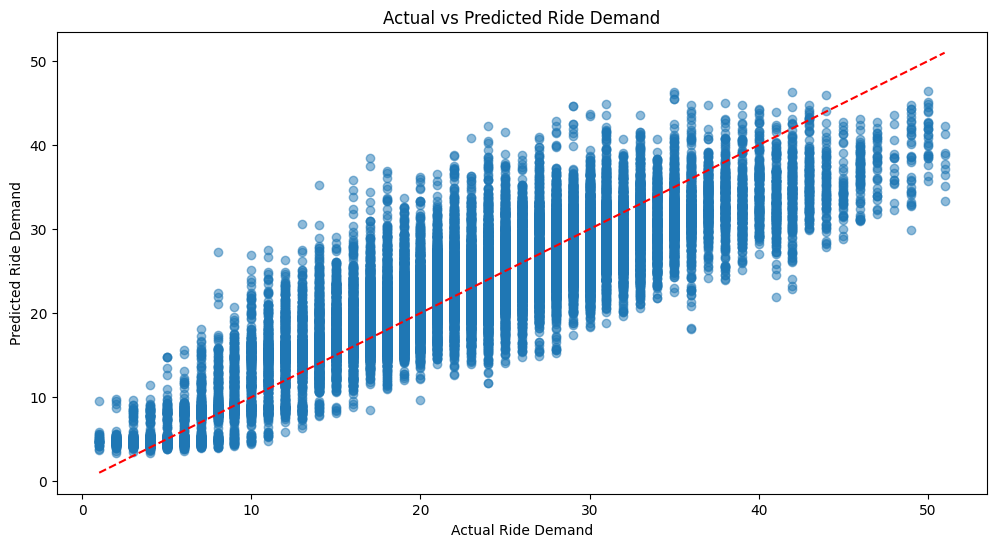

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect fit line
plt.xlabel("Actual Ride Demand")
plt.ylabel("Predicted Ride Demand")
plt.title("Actual vs Predicted Ride Demand")
plt.show()

**Residual Plot**

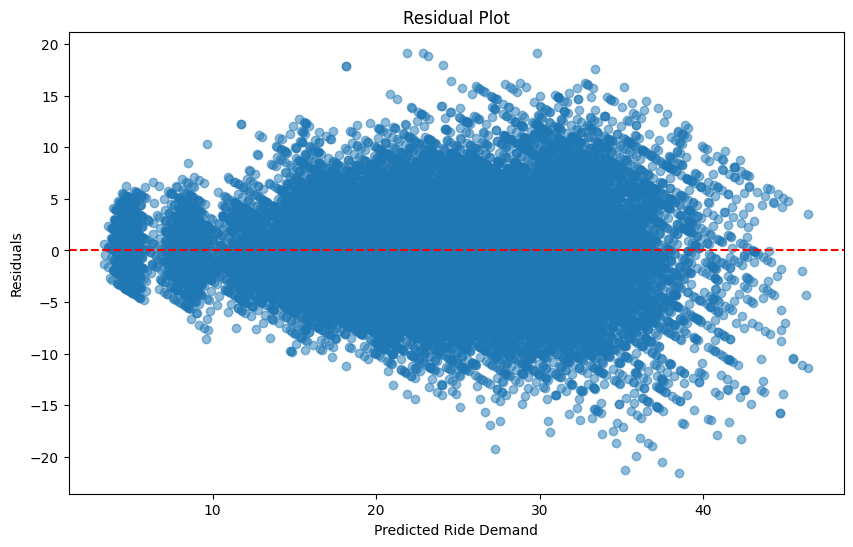

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Ride Demand")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


**Time Series Forecast Check (for trends)**

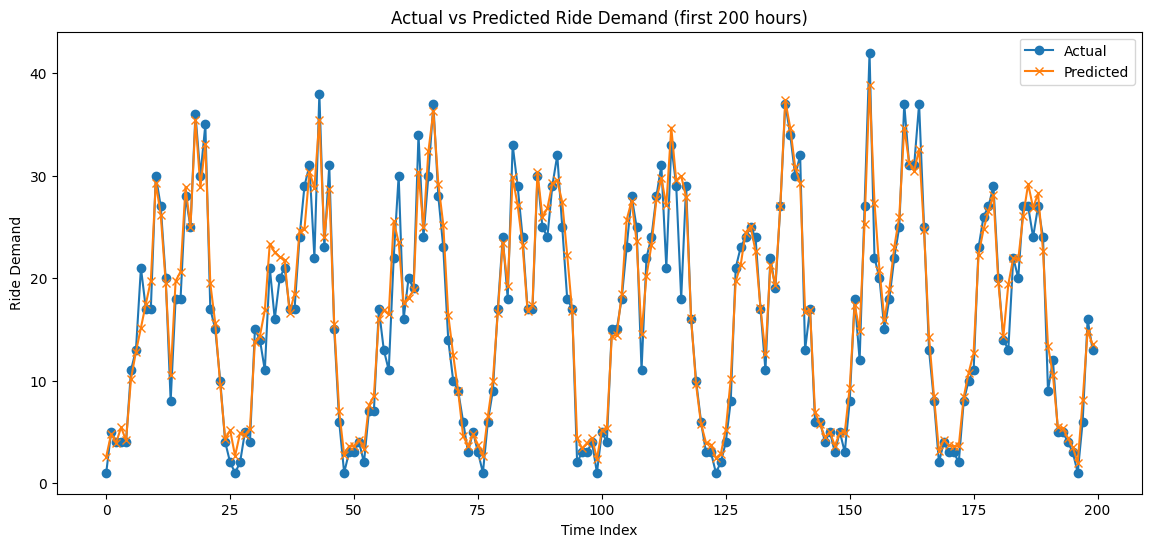

In [ ]:
# Create df_temp (unique date-hour combinations)
df_temp = df[['date','hour','ride_demand']].drop_duplicates().sort_values(['date','hour'])

# Build X_temp (features for those unique rows only)
X_temp = df.loc[df_temp.index, X.columns]

# Predict only for those rows
df_temp['Predicted'] = rf_model.predict(X_temp)

# Plot actual vs predicted
plt.figure(figsize=(14,6))
plt.plot(df_temp['ride_demand'].values[:200], label="Actual", marker="o")
plt.plot(df_temp['Predicted'].values[:200], label="Predicted", marker="x")
plt.title("Actual vs Predicted Ride Demand (first 200 hours)")
plt.xlabel("Time Index")
plt.ylabel("Ride Demand")
plt.legend()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [ ]:
dt_model = DecisionTreeRegressor(
    max_depth=10,        # limit depth to prevent overfitting
    min_samples_split=5, # minimum samples for a split
    random_state=42
)



In [ ]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)

In [ ]:
y_pred_dt = dt_model.predict(X_test)

In [ ]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor Performance:")
print(f"RMSE: {rmse_dt:.2f}")
print(f"MAE: {mae_dt:.2f}")
print(f"R² Score: {r2_dt:.2f}")

Decision Tree Regressor Performance:
RMSE: 4.63
MAE: 3.62
R² Score: 0.74


In [ ]:
metrics = {
    "Decision Tree": {"RMSE": rmse_dt, "MAE": mae_dt, "R2": r2_dt},
    "Random Forest": {"RMSE": rmse, "MAE": mae, "R2": r2}
}

# Convert to lists
models = list(metrics.keys())
rmse_values = [metrics[m]["RMSE"] for m in models]
mae_values = [metrics[m]["MAE"] for m in models]
r2_values  = [metrics[m]["R2"]  for m in models]


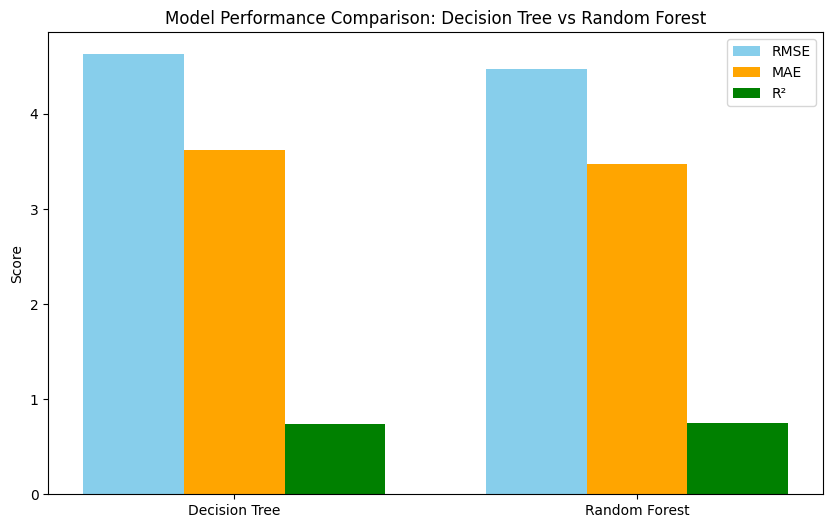

In [ ]:
# Plot side-by-side bar chart
x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10,6))

plt.bar(x - width, rmse_values, width, label="RMSE", color="skyblue")
plt.bar(x, mae_values, width, label="MAE", color="orange")
plt.bar(x + width, r2_values, width, label="R²", color="green")

plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Model Performance Comparison: Decision Tree vs Random Forest")
plt.legend()
plt.show()

**LINEAR REGRESSION**

Why Linear Regression?

It acts as a baseline model to compare with more complex ones like Random Forest and Decision Tree.

Helps to show improvement (you can justify why Random Forest was chosen for deployment).

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [ ]:
lr_model = LinearRegression()

In [ ]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_lr = lr_model.predict(X_test)

In [ ]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(" Linear Regression Results:")
print(f"RMSE: {rmse_lr:.2f}")
print(f"MAE : {mae_lr:.2f}")
print(f"R²  : {r2_lr:.2f}")

📊 Linear Regression Results:
RMSE: 7.21
MAE : 5.78
R²  : 0.36


In [ ]:
results = {
    "Random Forest": [rmse, mae, r2],
    "Decision Tree": [rmse_dt, mae_dt, r2_dt],
    "Linear Regression": [rmse_lr, mae_lr, r2_lr]
}



In [ ]:
# Convert to arrays for easy plotting
metrics = ["RMSE", "MAE", "R²"]
values = np.array(list(results.values()))
models = list(results.keys())

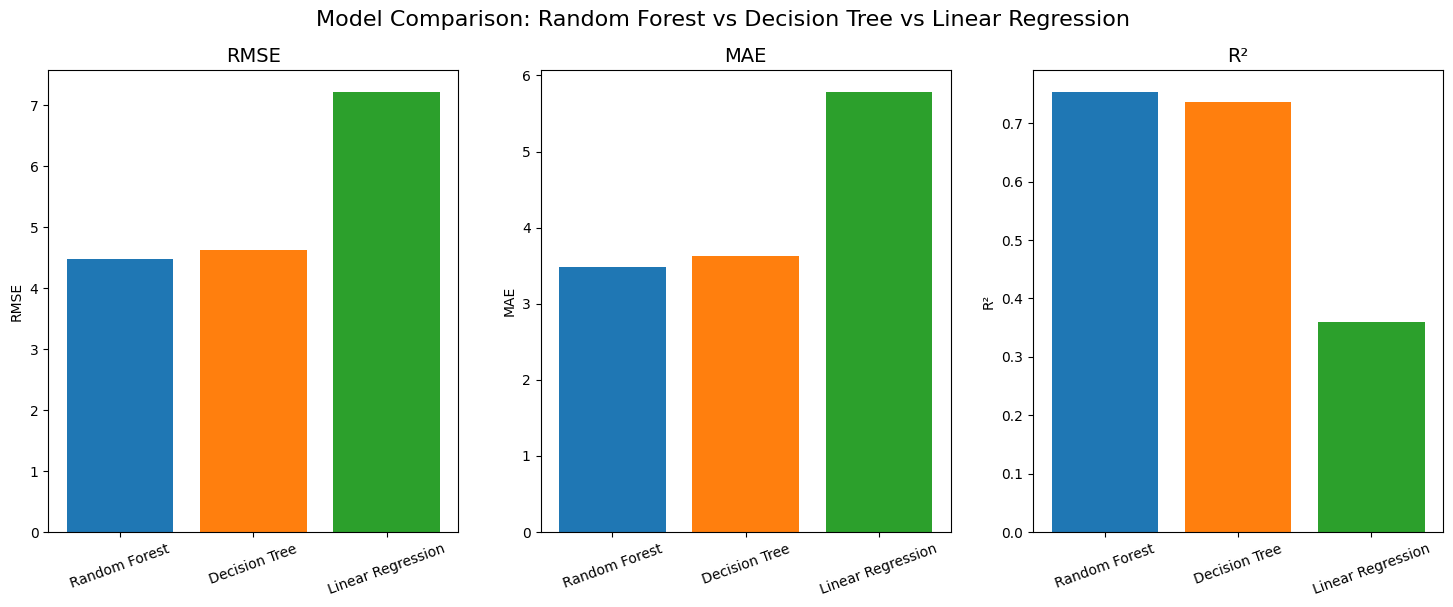

In [ ]:
# Plot
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics):
    ax[i].bar(models, values[:, i], color=["#1f77b4", "#ff7f0e", "#2ca02c"])
    ax[i].set_title(metric, fontsize=14)
    ax[i].set_ylabel(metric)
    ax[i].set_xticklabels(models, rotation=20)

plt.suptitle("Model Comparison: Random Forest vs Decision Tree vs Linear Regression", fontsize=16)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)  # you can tune n_neighbors later


In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred_knn = knn_model.predict(X_test)

In [ ]:
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Regression Performance:")
print("RMSE:", rmse_knn)
print("MAE:", mae_knn)
print("R²:", r2_knn)

KNN Regression Performance:
RMSE: 7.890318202286479
MAE: 6.215726666666667
R²: 0.2334923833563205


In [ ]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [ ]:
gb_model = GradientBoostingRegressor(
    n_estimators=200,       # number of boosting stages
    learning_rate=0.1,      # step size shrinkage
    max_depth=5,            # depth of each tree
    random_state=42
)

In [ ]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)

In [ ]:
y_pred_gb = gb_model.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae = mean_absolute_error(y_test, y_pred_gb)
r2 = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regressor Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Gradient Boosting Regressor Performance:
RMSE: 4.71
MAE: 3.69
R² Score: 0.73


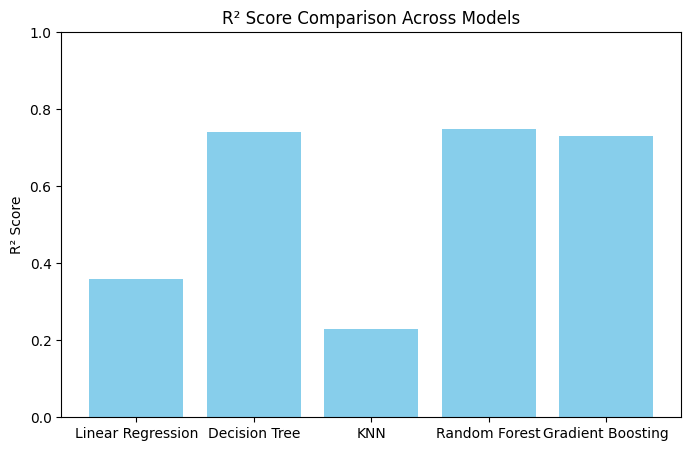

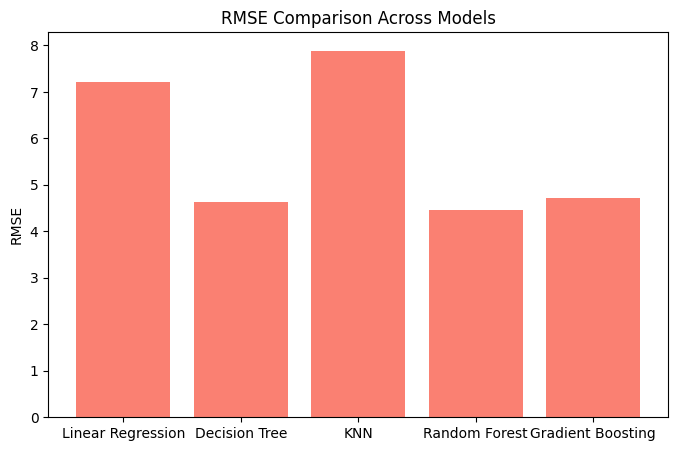

In [ ]:
# Collect metrics (replace with actual values from your runs)
models = ['Linear Regression', 'Decision Tree', 'KNN', 'Random Forest', 'Gradient Boosting']
r2_scores = [ 0.36, 0.74, 0.23, 0.75, 0.73]   # example values
rmse_scores = [7.21,  4.63, 7.89,  4.47,  4.71]          # example values

# Plot R² comparison
plt.figure(figsize=(8,5))
plt.bar(models, r2_scores, color='skyblue')
plt.title("R² Score Comparison Across Models")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.show()

# Plot RMSE comparison
plt.figure(figsize=(8,5))
plt.bar(models, rmse_scores, color='salmon')
plt.title("RMSE Comparison Across Models")
plt.ylabel("RMSE")
plt.show()
